# Project: TMDb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>
> This is a dataset that contains data from TMDb (The Movie Database), which is a community-driven platform that provides extensive information on movies, TV shows, and celebrities.
>
> This dataset will help me **train on data analization** (checking for missing values, decide what to do, whether I remove the records with missing data or keep them and replacing the missing data with some keyword I choose, or looking for unecessary duplicates, such as finding multiple records of the same movie, which in turn needs some cleaning, which is done by removing the duplicated records and leaving only the unique ones.

## Questions to be Explored
> - What is the **most productive production company** based on the data provided?
>
> - What kinds of **properties** are **associated with** movies that have **high revenues**?
>
> - Which **genres** are **most popular** from year to year?

In [1]:
# Import necessary libraries
import pandas as pd  # pandas is used for data manipulation and analysis

import matplotlib.pyplot as plt  # matplotlib is used for creating visualizations

import seaborn as sns  # seaborn builds on matplotlib for prettier plots

import matplotlib as mpl
# Magic Words
# To ensure that matplotlib plots are displayed directly inside the notebook instead of opening a separate cell:
%matplotlib inline

# To render higher resolution images
%config InlineBackend.figure_format = 'retina'

#### Functions

In [2]:
def bar_plotting(df, clmn, title=None, top_n=10):
    """
    Makes a plot bar

    Parameters:
    movies_data (DataFrame): The dataset containing 'budget' and 'revenue' columns
    column (str): The column that will be plotted
    title (str): The plot's title
    top_n (int): The nuumber of top values
    """
    # Close previous figures
    plt.close('all')

    # Split genre/production company strings into separate rows
    df_exploded = df[clmn].str.split('|').explode()

    # Get the top N most frequent genres
    top_categories = df_exploded.value_counts().head(top_n)

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax)

    # Add labels and title
    ax.set_xlabel("Count")
    ax.set_ylabel(clmn)
    ax.set_title(title)

    # Display the plot
    plt.show(block=True)

def scatter_plotting(df, clmn1, clmn2, title, xlabel, ylabel):
    """
    Plots the relationship between clmn1 and clmn2 using a scatter plot with a line

    Parameters:
    df (DataFrame): The dataset containing clmn1 and clmn2 columns
    clmn1 (str): The numeric column that will be put on the x-axis
    clmn2 (str): The numeric column that will be put on the y-axis
    title (str): The title of the plot
    xlabel (str): The label of the x-axis
    ylabel (str): The label of the y-axis
    """
    plt.figure(figsize=(10,6))
    # sns.regplot() → This is a Seaborn function that creates a scatter plot with a line
    # data=movies_data → Uses movies_data as the dataset
    # x=clmn1 → Sets the budget as the x-axis
    # y=clmn2 → Sets the revenue as the y-axis
    # scatter_kws={'alpha':0.5} ==>
    # scatter_kws → Customizes the scatter plot dots
    # alpha=0.5 → Makes the dots semi-transparent
    # Scatter plot with a line
    sns.regplot(data=df, x=clmn1, y=clmn2, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

    # Labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Add grid
    plt.grid(True)

    # Show plot
    plt.show()

<a id='wrangling'></a>
## 1. Data Wrangling

### 1.1 General Properties

In [3]:
# Reading the CSV file that was downloaded and loading it into a pandas DataFrame
movies_data = pd.read_csv('tmdb-movies.csv')

#View numerical statistics, including the 5-number summary and the mean
movies_data.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# Display the first 5 rows to preview the dataset
print("First 5 rows of the dataset:\n")

movies_data.head()

First 5 rows of the dataset:



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 1.2 Understand the Dataset

#### 1.2.1 Columns Description

<table class="table">
  <thead>
    <tr>
      <th scope="col">#</th>
      <th scope="col">Column Name</th>
      <th scope="col">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
        <th scope="row">1</th>
        <td>id</td>
        <td>A unique identifier for each record</td>
    </tr>
    <tr>
        <th scope="row">2</th>
        <td>imdb_id</td>
        <td>A unique identifier given for each movie by IMDb</td>
    </tr>
    <tr>
        <th scope="row">3</th>
        <td>popularity</td>
        <td>A number given for each movie to describe how popular it is based on multiple factors IMDb considers</td>
    </tr>
    <tr>
        <th scope="row">4</th>
        <td>budget</td>
        <td>The amount of money that was needed to make the movie</td>
    </tr>
    <tr>
        <th scope="row">5</th>
        <td>revenue</td>
        <td>The amount of money the production company has gained from the movie</td>
    </tr>
    <tr>
        <th scope="row">6</th>
        <td>original_title</td>
        <td>The title of the film/movie</td>
    </tr>
    <tr>
        <th scope="row">7</th>
        <td>cast</td>
        <td>The main actors of the movie</td>
    </tr>
    <tr>
        <th scope="row">8</th>
        <td>homepage</td>
        <td>The link to the homepage of the production company where the movie they produced is featured</td>
    </tr>
    <tr>
        <th scope="row">9</th>
        <td>director</td>
        <td>The movie's director</td>
    </tr>
    <tr>
        <th scope="row">10</th>
        <td>tagline</td>
        <td>A popular phrase from a movie</td>
    </tr>
    <tr>
        <th scope="row">11</th>
        <td>overview</td>
        <td>An introduction to the movie</td>
    </tr>
    <tr>
        <th scope="row">12</th>
        <td>runtime</td>
        <td>The duration of the movie in minutes</td>
    </tr>
    <tr>
        <th scope="row">13</th>
        <td>genres</td>
        <td>The genres this movie is associated with</td>
    </tr>
    <tr>
        <th scope="row">14</th>
        <td>production_company</td>
        <td>The names of the production companies who worked on the movie</td>
    </tr>
    <tr>
        <th scope="row">15</th>
        <td>release_date</td>
        <td>The date when the movie was first released to the public</td>
    </tr>
    <tr>
        <th scope="row">16</th>
        <td>vote_count</td>
        <td>The number of votes for the movie (indicating the number of people who watched and liked it and decided to vote)</td>
    </tr>
    <tr>
        <th scope="row">17</th>
        <td>vote_average</td>
        <td>The average rating the movie received from voters</td>
    </tr>
    <tr>
        <th scope="row">18</th>
        <td>release_year</td>
        <td>The year when the movie was released</td>
    </tr>
      <tr>
        <th scope="row">19</th>
        <td>budget_adj</td>
        <td>The budget of the associated movie in terms of 2010 dollars, accounting for inflation over time (to make values comparable across different years)</td>
    </tr>
      <tr>
        <th scope="row">20</th>
        <td>revenue_adj</td>
        <td>The revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time (to make values comparable across different years)</td>
    </tr>
  </tbody>
</table>

In [5]:
# Providing a summary of the dataset, including column names, data types, and non-null value counts.
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### 1.2.2 Observation
> The dataset has 10866 rows and 21 columns, with missing values in key columns like cast (10790), homepage (2936), director (10822), tagline (8042), keywords (9373), overview (10862), genres (10843) and production_companies (9836).
>
> Some data types are incorrect, such as release_date, which should be converted to a datetime format.
>
> I think the release_year should be converted to type int64, because years have no decimal values.

### 1.3 Check for Missing Values

In [6]:
# Counting the missing values in each column to identify areas needing cleaning.
print(f"Number of missing values in each column:\n{movies_data.isnull().sum()}")

Number of missing values in each column:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### 1.4 Check for Duplicate Rows

In [7]:
# Counting the number of duplicate rows in the dataset
print(f"Number of duplicated rows: {movies_data.duplicated().sum()}")

Number of duplicated rows: 1


### 1.5 Checking for Inconsistencies
> There are no columns that have certain values that should be written in a specific way (like 'Gender').

In [8]:
# Identify columns with inconsistencies in their values
print(f"Number of unique value in each column\n{movies_data.nunique()}")

Number of unique value in each column
id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### 1.6 Data Cleaning

#### 1.6.1 Fixing Data Types
&rarr; == change to
<br>
release_date &rarr; datetime format
<br>
release_year &rarr; int64

In [9]:
# Convert release_year to int by casting
movies_data['release_year'] = movies_data['release_year'].astype(int)

# Convert release_date to datetime format
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'], errors='coerce')

# Confirm the changes
movies_data.dtypes[['release_year', 'release_date']];

C:\Users\I-SEVEN\AppData\Local\Temp\ipykernel_13640\593558520.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  movies_data['release_date'] = pd.to_datetime(movies_data['release_date'], errors='coerce')


#### 1.6.2 Handling Missing Values

In [10]:
# Fill missing values in categorical columns with “Unknown”
movies_data['imdb_id'] = movies_data['imdb_id'].fillna('Unknown')
movies_data['homepage'] = movies_data['homepage'].fillna('Unknown')
movies_data['cast'] = movies_data['cast'].fillna('Unknown')
movies_data['director'] = movies_data['director'].fillna('Unknown')
movies_data['tagline'] = movies_data['tagline'].fillna('Unknown')
movies_data['keywords'] = movies_data['keywords'].fillna('Unknown')
movies_data['overview'] = movies_data['overview'].fillna('Unknown')
movies_data['genres'] = movies_data['genres'].fillna('Unknown')
movies_data['production_companies'] = movies_data['production_companies'].fillna('Unknown')

# Confirm no more missing values
print(movies_data.isnull().sum())

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


#### 1.6.3 Removing Duplicates

In [11]:
# Drop duplicate rows
movies_data = movies_data.drop_duplicates()

# Confirm removal
print(f"Number of duplicate rows remaining: {movies_data.duplicated().sum()}")

Number of duplicate rows remaining: 0


#### 1.6.4 Addressing Invalid Ranges

In [12]:
# This includes summaries for numerical columns.
movies_data.describe()

,id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,2007-05-14 21:31:25.651173376,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1975-01-01 00:00:00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,1998-04-17 00:00:00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,2007-08-03 00:00:00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,2012-10-05 00:00:00,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,2074-12-20 00:00:00,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,NaN,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08


**Observation**
> - No movie costs nothing for production, and no movie has a revenue of 0, the revenue might be much less than the budget, but companies still get some money back.
>
> - How come a movie runs for 0 minutes?
>
> - It's the same comment on the adjusted budget and adjusted revenue.
>
> - Even these 4 column's 1st and 2nd quartile's values are 0s.
>
> - The min of the release date has a logical value, as long as it's not less than 1888.
>
> - If the runtime is in minutes as I suppose, it's impossible for a movie to be 900 minutes long, because it translates to 15 hours.
&darr;
>
> - Actually... I take my words back, I found out that there is a film that is 51420 minutes (857 h) long.

In [13]:
# Define acceptable min for budget/adjusted budget, and the revenue/adjusted revenue
min_budget = min_adjusted_budget = 50000 # A more logical budget, considering paying the cast, editing the movie, preparing shooting locations, trailers, etc...
min_revenue = min_adjusted_revenue = 30 # According to the lowest gross ever recorded (for the movie 'Zyzzyx')


# Remove rows with budgets, udjusted budgets, revenues, adjusted revenues receding the min possible values
movies_data = movies_data[
    (movies_data['budget'] >= min_budget) &
    (movies_data['budget_adj'] >= min_adjusted_budget) &
    (movies_data['revenue'] >= min_revenue) &
    (movies_data['revenue_adj'] >= min_adjusted_revenue)
]

# Verifying cleaned dataset
print(f"After cleaning, budget column stats:\n{movies_data['budget'].describe()}\n")
print(f"After cleaning, buget_adj column stats:\n{movies_data['budget_adj'].describe()}\n")
print(f"After cleaning, revenue column stats:\n{movies_data['revenue'].describe()}\n")
print(f"After cleaning, revenue_adj column stats:\n{movies_data['revenue_adj'].describe()}\n")

After cleaning, budget column stats:
count    3.809000e+03
mean     3.761779e+07
std      4.227908e+07
min      5.000000e+04
25%      1.000000e+07
50%      2.500000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

After cleaning, buget_adj column stats:
count    3.809000e+03
mean     4.472869e+07
std      4.483803e+07
min      5.258343e+04
25%      1.354637e+07
50%      3.038360e+07
75%      6.081498e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

After cleaning, revenue column stats:
count    3.809000e+03
mean     1.088044e+08
std      1.772002e+08
min      4.600000e+01
25%      1.435648e+07
50%      4.604440e+07
75%      1.255861e+08
max      2.781506e+09
Name: revenue, dtype: float64

After cleaning, revenue_adj column stats:
count    3.809000e+03
mean     1.384633e+08
std      2.168866e+08
min      4.837675e+01
25%      1.922895e+07
50%      6.264908e+07
75%      1.649218e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64



In [14]:
# Check if invalid values still exist
print(f"Invalid budget/adjusted budget values remaining: {(movies_data['budget'] < min_budget).sum()}")
print(f"Invalid revenue values remaining: {(movies_data['revenue'] < min_revenue).sum()}")

Invalid budget/adjusted budget values remaining: 0
Invalid revenue values remaining: 0


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1
### Which genres are most popular from year to year?



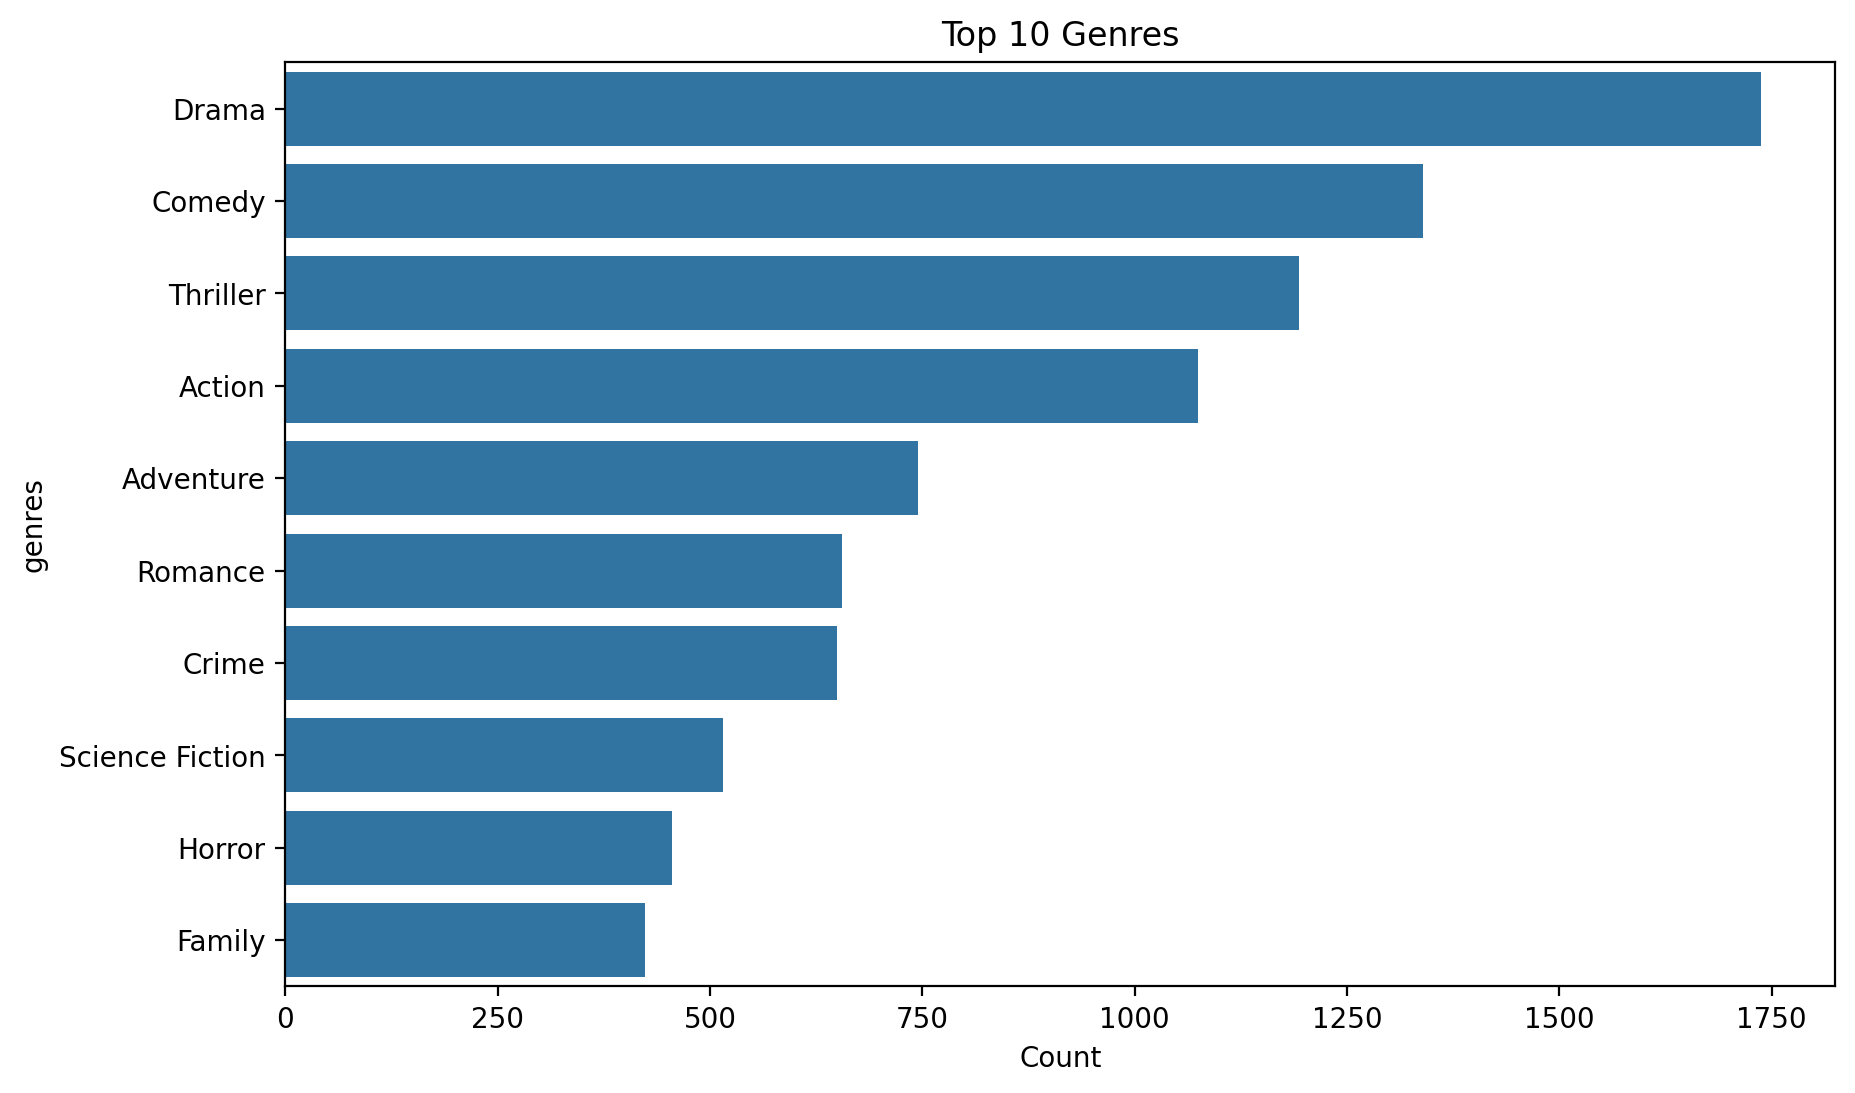

In [15]:
# The top 10 genres in movie production based on the dataset
bar_plotting(movies_data, 'genres', "Top 10 Genres", top_n=10)

#### Observation
> Looks like drama is the most popular genres among others in movies.


### Research Question 2
### What is the most productive production company based on the data provided?

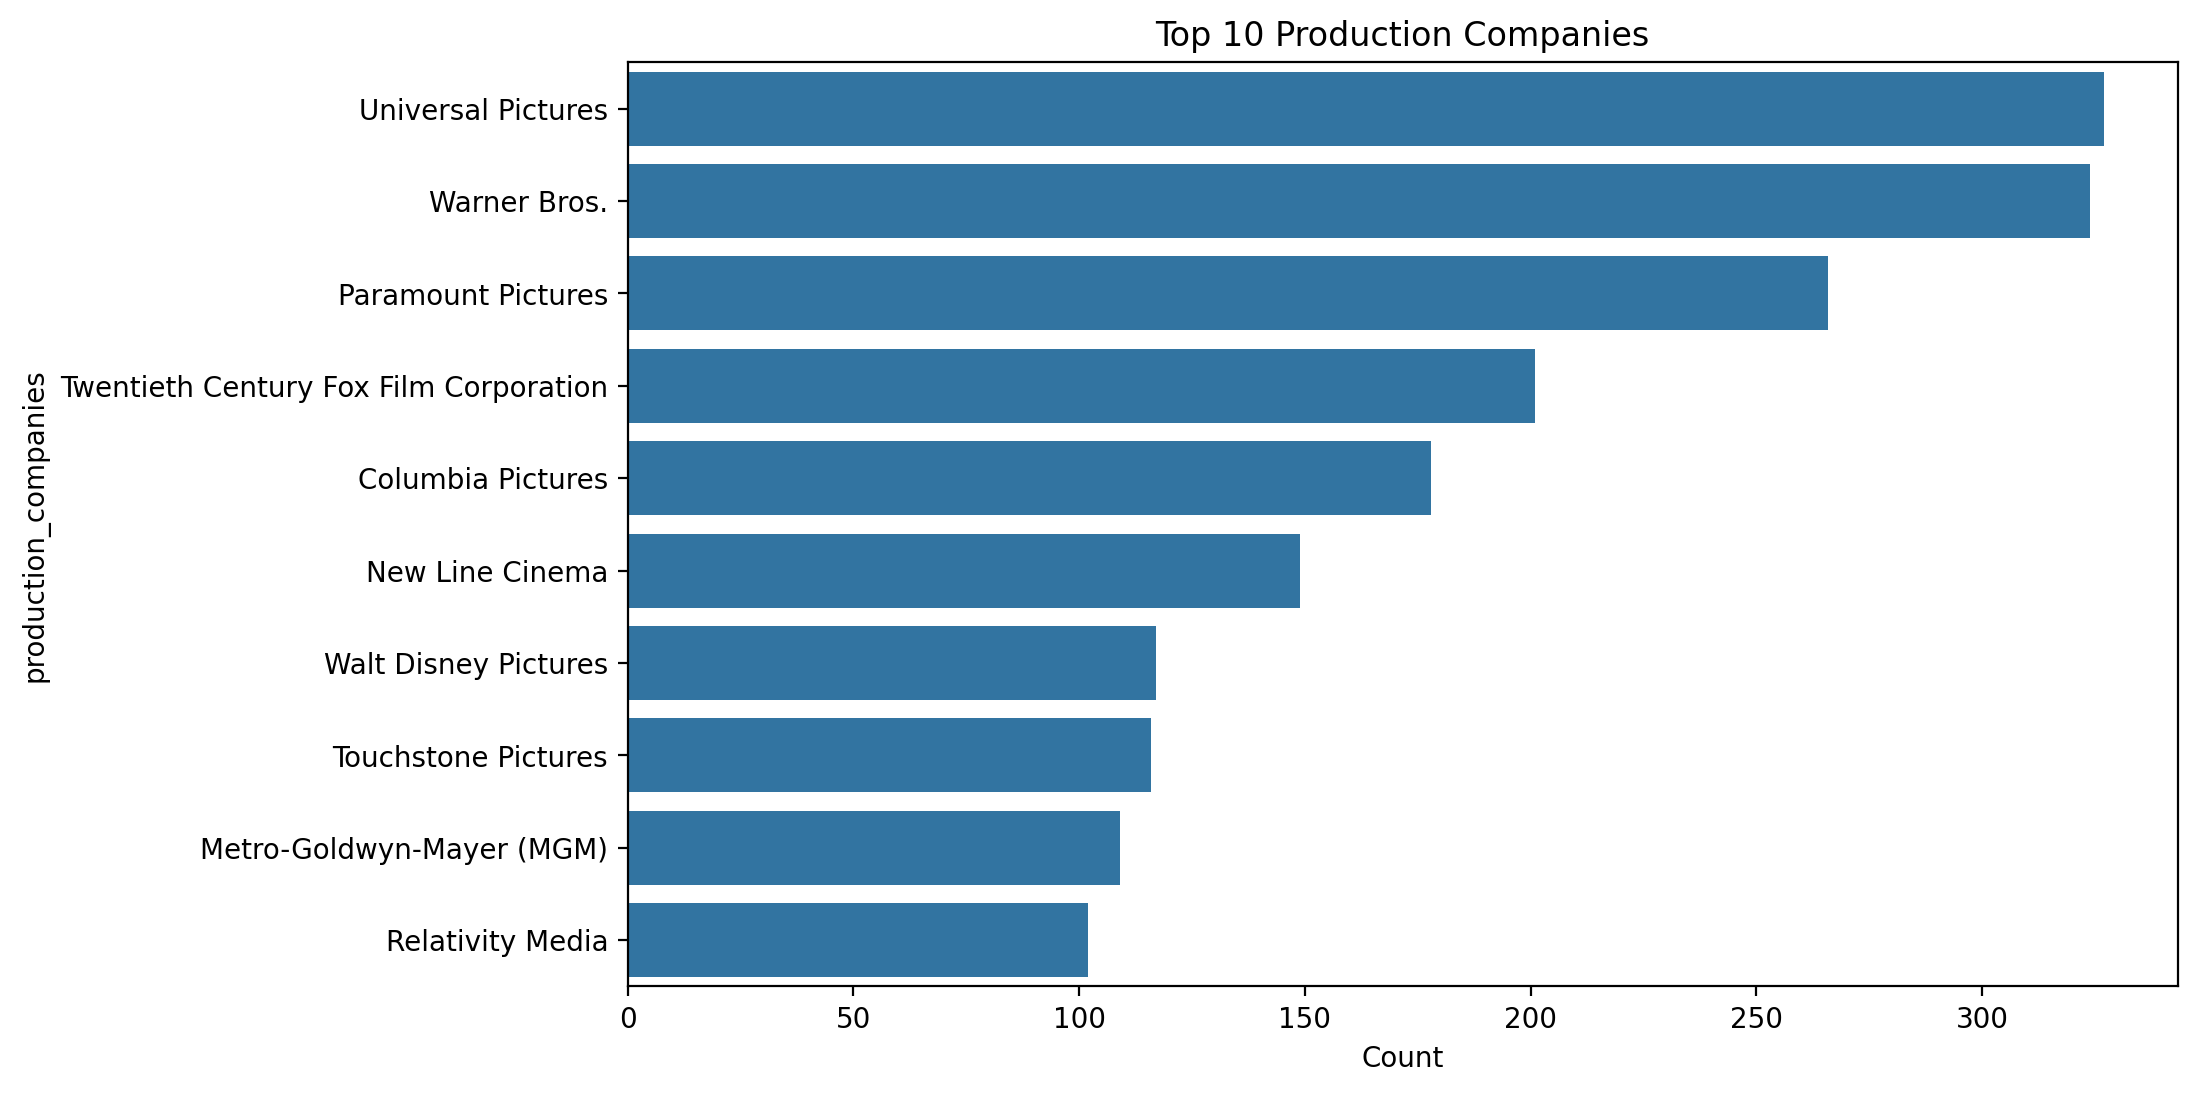

In [16]:
bar_plotting(movies_data, 'production_companies', title="Top 10 Production Companies")

#### Observation
> The most productive production company is Universal Pictures.

#### Research Question 3

### What kinds of properties are associated with movies that have high revenues?
#### 1. Does the budget of a movie affect its revenue in the future?




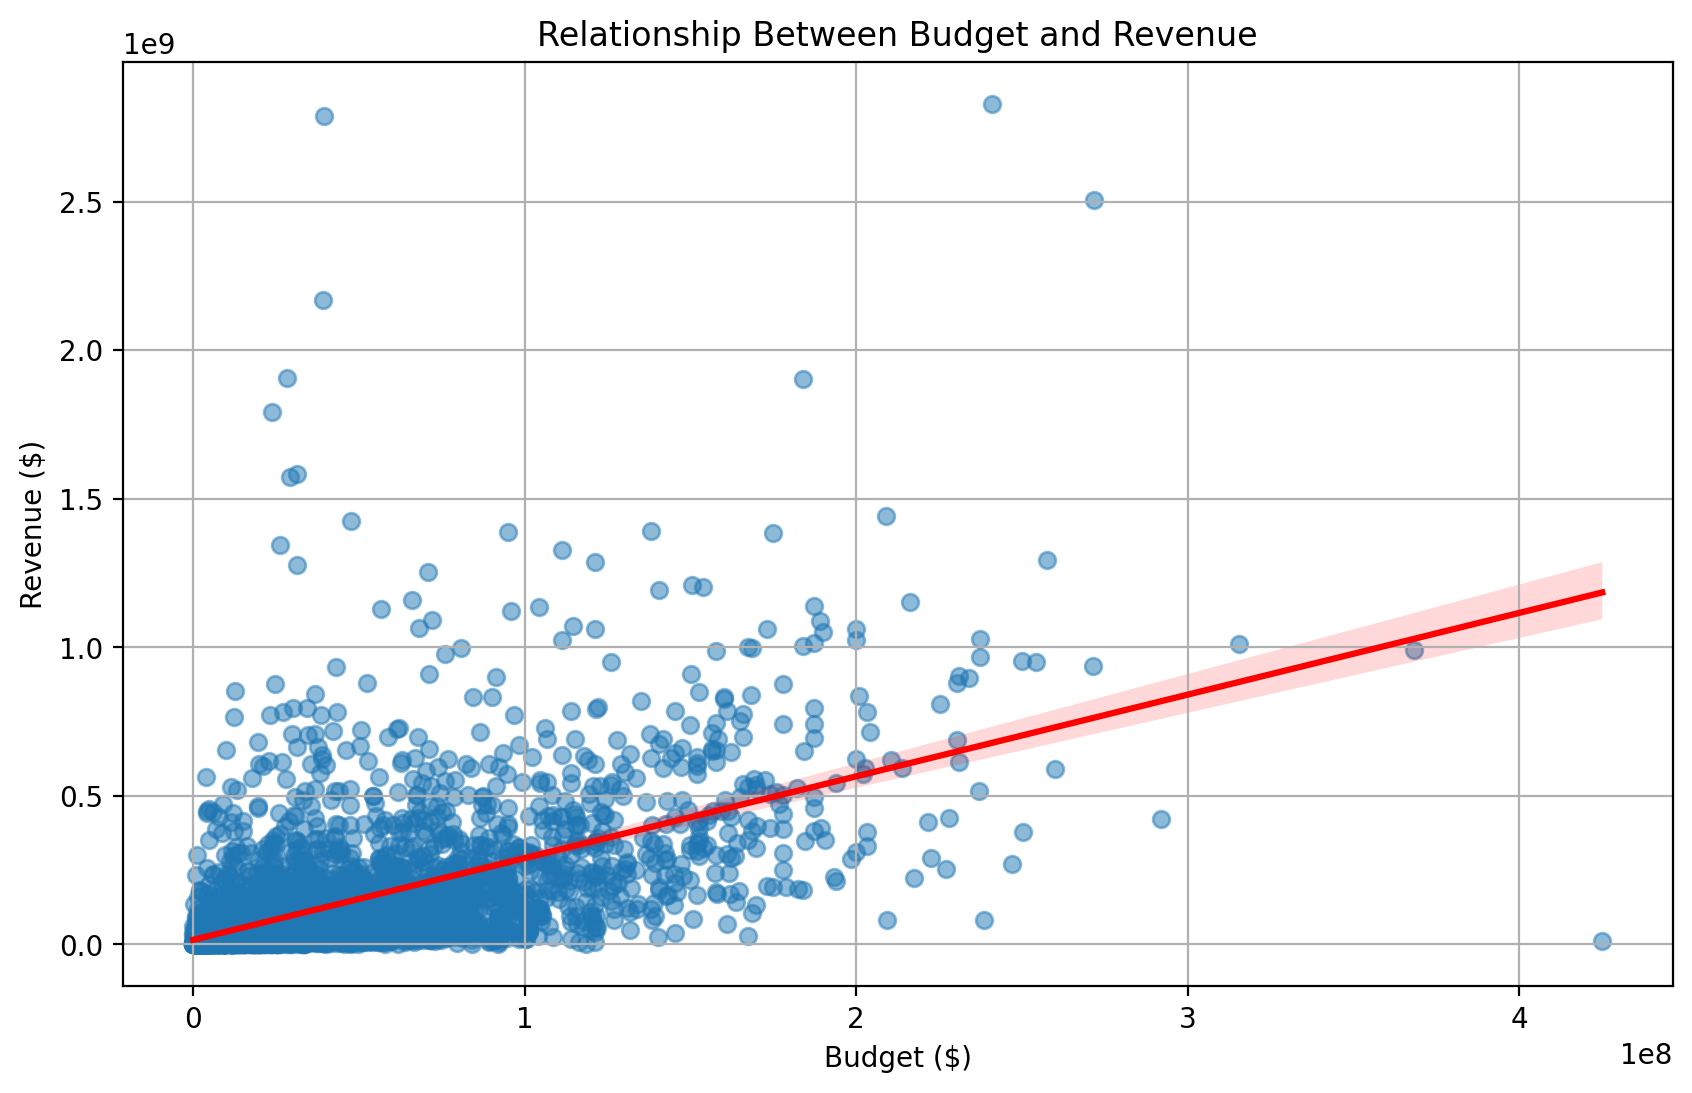

In [17]:
scatter_plotting(movies_data, 'budget_adj', 'revenue_adj', "Relationship Between Budget and Revenue", "Budget ($)", "Revenue ($)")

#### Observation
> I noticed that most movies in the dataset have more revenue than their budgets.
>
> I also noticed that the more the production companies pay, the more likely they are to get high revenues.

#### 2. For a movie having a high revenue, does popularity have anything to do with that?

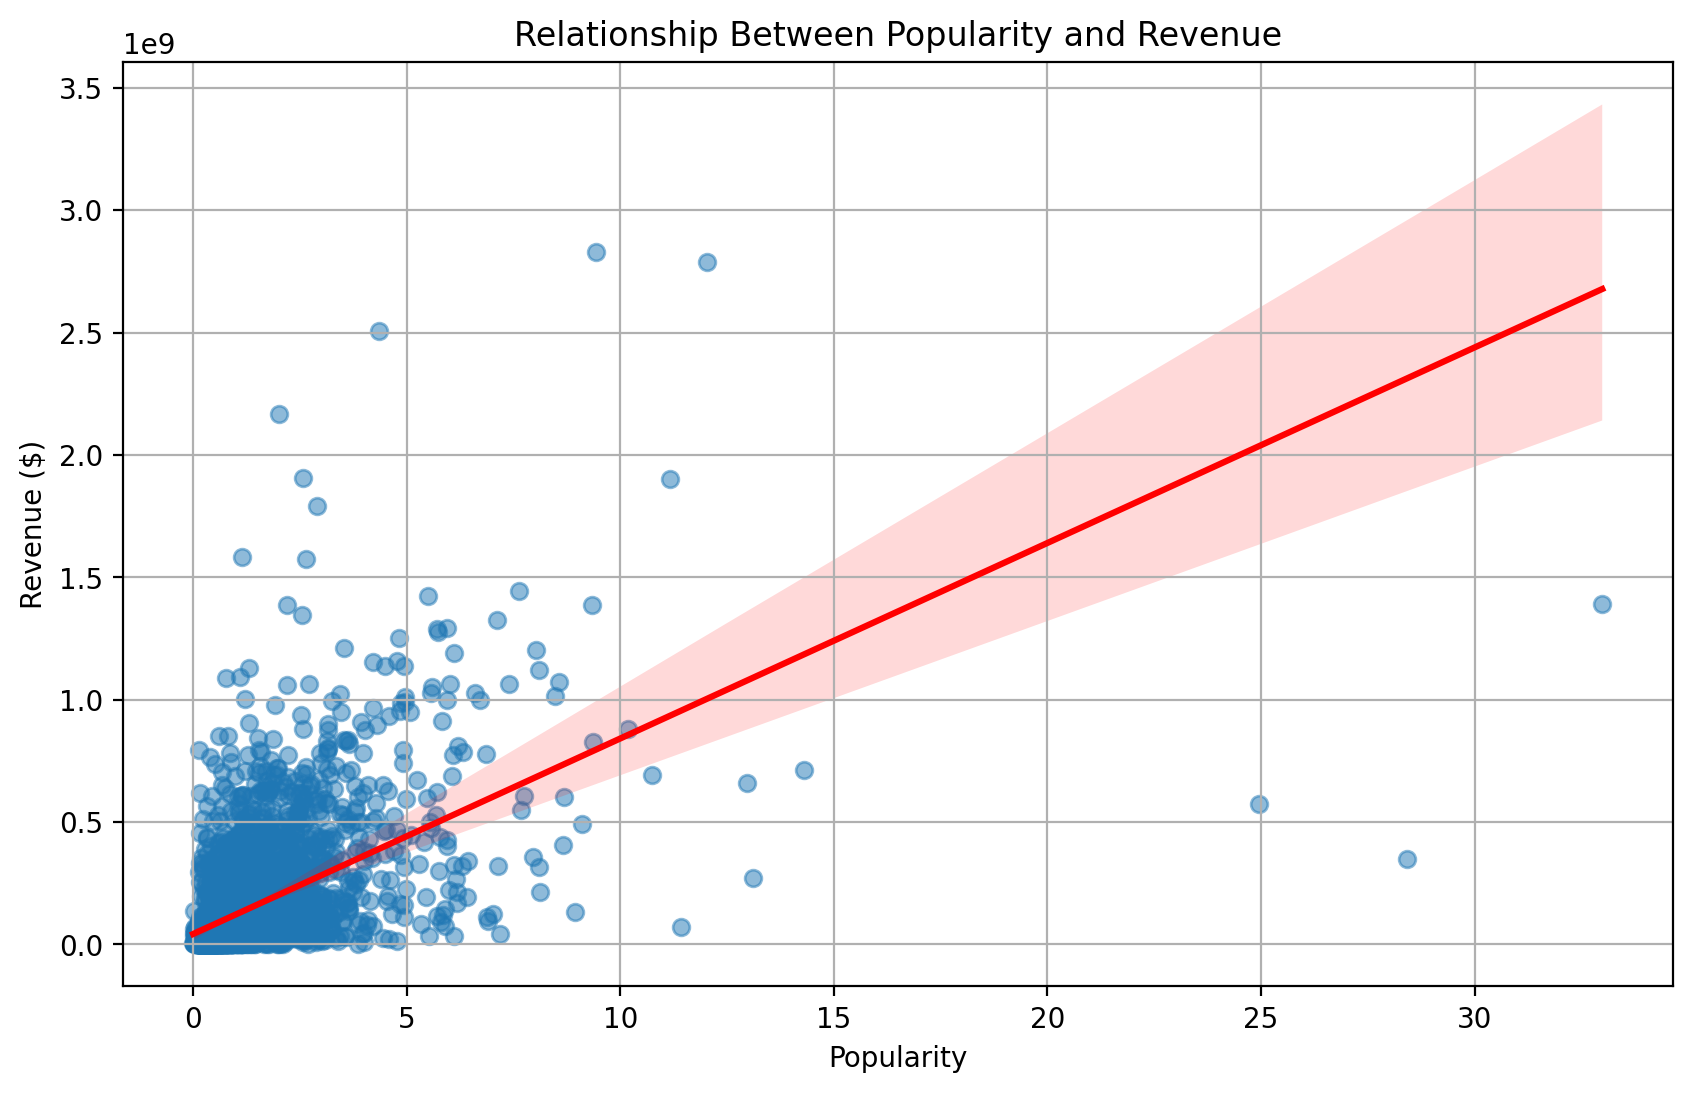

In [18]:
scatter_plotting(movies_data, 'popularity', 'revenue_adj', "Relationship Between Popularity and Revenue", "Popularity", "Revenue ($)")

#### Observation
> Popularity doesn't necessarily affect the revenue, although, it does play a big role.

<a id='conclusions'></a>
## Conclusions

> Limitations throughout the Analysis Process:
>> 1. Time
>> 2. Lacking Professionalism as a Beginner

> I learned that popularity and budgets correlate with revenues, and that the most popular genre is drama.
>
### Resources
https://www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram     
</br>
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
</br>
https://www.udacity.com/blog/2025/02/exploratory-data-analysis-eda-why-its-crucial-for-data-science.html 
</br>
https://www.udacity.com/blog/2025/01/how-to-clean-data-for-machine-learning-best-practices-and-tools.html     
</br>
https://www.data-to-viz.com/ 
</br>
https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/